In [195]:
import os 
print('total Validation COVID-19 images:', len(os.listdir('./data/VAL/COVID-19')))
print('total Validation Healthy images:', len(os.listdir('./data/VAL/Healthy')))

print('total Training COVID-19 images:', len(os.listdir('./data/TRAIN/COVID-19')))
print('total Training Healthy images:', len(os.listdir('./data/TRAIN/Healthy')))

total Validation COVID-19 images: 5
total Validation Healthy images: 5
total Training COVID-19 images: 20
total Training Healthy images: 19


In [196]:
train_dir = './data/TRAIN'
validation_dir = './data/VAL'

In [197]:
from tensorflow.keras.models import Sequential
from keras import layers # n'est plus utile

from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
#Dense ==> fully connected
#Conv2D ==> convolution
#Flatten ==> transfert entre Couche de convolution et fullyconnected
#MaxPooling2D ==> pooling (Max ou average)

from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
# des commandes utiles pour des callbacks (avoir un retour pendant l'execution)

# socle sur le quel on va installer les différentes couches de l'architecture
model = Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(227, 227, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.25) )# supprimer aléatoirement un certain nombre de neuronne de temps à autres 
model.add(layers.Dense(256, activation='sigmoid'))

model.add(layers.Dense(2, activation='softmax'))


c:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [198]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_50 (Conv2D)              │ (None, 225, 225, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 110, 110, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 55, 55, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 53, 53, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_53 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 256)            │     9,437,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,826,370 (37.48 MB)

 Trainable params: 9,826,370 (37.48 MB)

 Non-trainable params: 0 (0.00 B)

In [199]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# pour générer des images synthétique dans la RAM pour l'apprentissage (non disponibles sur le disque)

train_datagen = ImageDataGenerator(rescale=1./255, # normalisation
                                   rotation_range=10, # 10 est le degré de rotation
                                   zoom_range=0.4,
                                   horizontal_flip=True,
                                   vertical_flip=True, # flip est comme un effet miroir
                                   fill_mode='nearest') # nearest est la méthode d'interpolation

Val_datagen = ImageDataGenerator(rescale=1./255) # juste la normalisation

train_generator = train_datagen.flow_from_directory(  #application du générateur sur la base initiale
    train_dir,
    target_size=(227, 227),
    batch_size=2, # mise à jour toutes les deux images
    #class_mode='binary')
# si on ne veut pas faire une binary classification, mais plutôt une multiclassification
    class_mode='categorical')

validation_generator = Val_datagen.flow_from_directory(
    validation_dir,
    target_size=(227, 227),
    batch_size=2,
    # class_mode='binary')
# si on ne veut pas faire une binary classification, mais plutôt une multiclassification
    class_mode='categorical')

Found 39 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [200]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]
# model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# si on ne veut pas faire une binary classification, mais plutôt une multiclassification
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator,
    callbacks=callbacks_list
)

Epoch 1/25


c:\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.5195 - loss: 0.8902 - val_accuracy: 0.5000 - val_loss: 0.6525 - learning_rate: 0.0010
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8219 - loss: 0.5937 - val_accuracy: 0.9000 - val_loss: 0.3332 - learning_rate: 0.0010
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7125 - loss: 0.5501 - val_accuracy: 0.7000 - val_loss: 0.6463 - learning_rate: 0.0010
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.6641 - loss: 0.5461 - val_accuracy: 1.0000 - val_loss: 0.3074 - learning_rate: 0.0010
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7172 - loss: 0.5525 - val_accuracy: 0.5000 - val_loss: 0.7172 - learning_rate: 0.0010
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.4227 - loss: 0.6839 - val_accuracy: 0.6000 - val_loss: 0.4636 - learning_rate: 0.0010
Epoch 7/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7538 - loss: 0.7683 - val_accuracy: 0.60

In [201]:
# Sauvegarder le modèle entier
model.save('../model/model_CNN.h5')
print("Modèle sauvegardé sous le nom 'mon_modele.h5'")


Modèle sauvegardé sous le nom 'mon_modele.h5'


In [202]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
img_path='./data/TEST/COVID-19/COVID-19.jpeg'

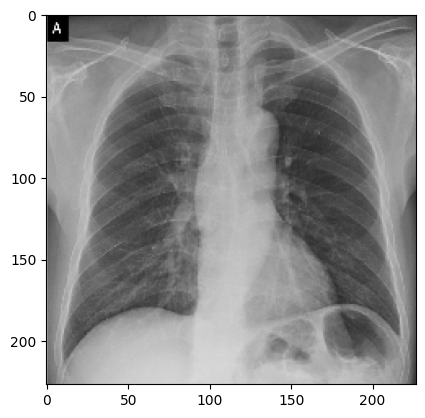

In [203]:
img = image.load_img(img_path, target_size=(227, 227))
plt.imshow(img)
plt.show()

In [204]:
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [205]:
print(score)

[[0.3375429 0.6624571]]


**En cas d'une classification binaire**

In [206]:
for s in score:
    probability = s[0]  # Si chaque élément de `score` est un tableau de probabilités, prenez la première classe
    print('Predicted:', probability, 'COVID-19' if probability < 0.5 else 'Healthy')


Predicted: 0.3375429 COVID-19


In [207]:
# ou bien toujours en cas d'une classification binaire

for s in score:
    probability = s[0]  # La probabilité de la classe "COVID-19" (première classe dans un tableau de deux éléments)
    if probability < 0.5:
        print("COVID-19")
    else:
        print("Healthy")


COVID-19


In [208]:
# Extraire les données de l'historique
epochs = history.epoch
train_accuracies = history.history['accuracy']
val_accuracies = history.history['val_accuracy']
train_losses = history.history['loss']
val_losses = history.history['val_loss']

# Organiser les informations dans une liste de dictionnaires
results = []
for epoch, train_acc, val_acc, train_loss, val_loss in zip(epochs, train_accuracies, val_accuracies, train_losses, val_losses):
    result = {
        'epoch': epoch + 1,  # Les époques commencent à 0, donc ajouter 1 pour commencer à 1
        'accuracy': train_acc,
        'score': [train_loss, val_loss]
    }
    results.append(result)


print(results[-1])

{'epoch': 7, 'accuracy': 0.692307710647583, 'score': [0.8277141451835632, 0.48671403527259827]}


In [209]:
import pandas as pd
# Extraire les données de l'historique
epochs = history.epoch
train_losses = history.history['loss']
val_losses = history.history['val_loss']
train_accuracies = history.history['accuracy']
val_accuracies = history.history['val_accuracy']

# Créer un dictionnaire avec les données
data = {
    'epoch': epochs,
    'train_loss': train_losses,
    'val_loss': val_losses,
    'train_accuracy': train_accuracies,
    'val_accuracy': val_accuracies
}

# Convertir le dictionnaire en DataFrame
df = pd.DataFrame(data)

if not os.path.exists('../resultats'):
    os.makedirs('../resultats')

# Écrire le DataFrame dans un fichier CSV
df.to_csv('../resultats/resultats_CNN.csv', index=False)

print("Les résultats ont été écrits dans le fichier resultats.csv")

Les résultats ont été écrits dans le fichier resultats.csv
